# ENTREGA 1

## PBL Fase 6 – Visão Computacional com YOLOv5

### Reconhecimento de Veículos: Carros e Motos

Este notebook apresenta o desenvolvimento de um sistema de visão computacional utilizando a arquitetura YOLOv5 para detectar e classificar dois tipos de veículos: carros e motos. A atividade faz parte da Fase 6 do Projeto Baseado em Problemas (PBL) da FIAP, no contexto da empresa fictícia FarmTech Solutions, que está explorando o uso de inteligência artificial em aplicações de segurança patrimonial e automação.

O objetivo principal é treinar um modelo YOLOv5 com base em imagens rotuladas manualmente e avaliar seu desempenho na detecção dos objetos escolhidos. O projeto envolve também a comparação de resultados com diferentes quantidades de épocas de treinamento.

### Objetivos do notebook

- Organizar e utilizar um dataset rotulado manualmente.
- Treinar um modelo YOLOv5 com 30 e 60 épocas.
- Avaliar acurácia, perda e desempenho.
- Realizar inferência em imagens de teste.
- Apresentar conclusões com base nos resultados obtidos.

### Aquisição e preparação do dataset

Para este projeto, foram utilizadas imagens de dois objetos distintos: **carros** e **motos**. As imagens foram obtidas manualmente a partir de pesquisas com licenciamento livre (Creative Commons) e screenshots, priorizando variedade de ângulos e contextos.

Após a coleta, foram selecionadas:

- 40 imagens de carros
- 40 imagens de motos

As imagens foram rotuladas manualmente utilizando a plataforma [MakeSense.ai](https://www.makesense.ai/), onde foram desenhadas as bounding boxes para cada objeto identificado e atribuídos os rótulos correspondentes.

A estrutura final do dataset foi organizada conforme o padrão exigido pelo YOLOv5, separando as imagens e seus respectivos rótulos em três conjuntos:

- **Treinamento**: 32 imagens de cada classe (total de 64)
- **Validação**: 4 imagens de cada classe (total de 8)
- **Teste**: 4 imagens de cada classe (total de 8)

As pastas estão organizadas da seguinte forma:

```
📦 1TIAOR20242_FASE6_CAP1
│── 📁 dataset_images               # Pasta principal contendo imagens e labels
│   ├── 📁 images                   # Subpasta com as imagens divididas em conjuntos
│   │   ├── 📁 train                # Imagens utilizadas no treinamento (64 imagens)
│   │   ├── 📁 val                  # Imagens utilizadas na validação (8 imagens)
│   │   ├── 📁 test                 # Imagens utilizadas para avaliação final (8 imagens)
│   ├── 📁 labels                   # Subpasta com os arquivos de rótulo no formato YOLO
│   │   ├── 📁 train                # Labels correspondentes às imagens de treinamento
│   │   ├── 📁 val                  # Labels correspondentes às imagens de validação
│   │   ├── 📁 test                 # Labels correspondentes às imagens de teste
│── 📄 veiculos.yaml                # Arquivo de configuração que define caminhos, número de classes e seus nomes
```
### Estrutura deste notebook

1. Verificação da disponibilidade de GPU
2. Conexão com o Google Drive e preparação do ambiente
3. Clonagem do repositório YOLOv5 e instalação das dependências
4. Treinamento do modelo com 30 épocas
5. Treinamento do modelo com 60 épocas
6. Comparação dos resultados
7. Inferência no conjunto de teste
8. Conclusões

## Verificação da disponibilidade de GPU

Antes de prosseguir com a montagem do ambiente e instalação das dependências, é importante verificar se o ambiente Colab está configurado com GPU.

O uso da GPU é altamente recomendado para o treinamento de modelos de detecção de objetos, pois reduz significativamente o tempo de execução. Caso a GPU não esteja habilitada, será necessário alterar o tipo de ambiente e reiniciar o notebook.


In [8]:
import torch

if torch.cuda.is_available():
    device_name = torch.cuda.get_device_name(0)
    print("\033[92m✅ GPU disponível:\033[0m", device_name)
    print("O ambiente está configurado corretamente. Você pode prosseguir com as próximas etapas.")
else:
    print("\033[91m❌ ATENÇÃO: GPU não disponível. O notebook está executando em CPU.\033[0m\n")
    print("❗ O treinamento com YOLOv5 em CPU pode ser extremamente lento e está sujeito a interrupções por tempo limite.")
    print("\n\033[1mRecomendações:\033[0m")
    print("- Vá até o menu 'Ambiente de execução > Alterar tipo de ambiente de execução'")
    print("- Selecione 'GPU' como acelerador de hardware e clique em 'Salvar'")
    print("- O ambiente será reiniciado. Após a reinicialização, reexecute esta célula antes de continuar.")


✅ GPU disponível: Tesla T4
O ambiente está configurado corretamente. Você pode prosseguir com as próximas etapas.


## Conexão com o Google Drive

Nesta etapa, vamos conectar o ambiente do Google Colab com a conta do Google Drive onde o dataset e os arquivos de configuração estão armazenados.

Essa conexão permite que o notebook tenha acesso direto aos arquivos necessários para o treinamento, validação e testes do modelo, como imagens, rótulos e o arquivo de configuração `.yaml`.


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Clonagem do repositório YOLOv5

Nesta etapa, clonamos o repositório oficial do YOLOv5, mantido pela Ultralytics. Esse repositório contém os scripts de treinamento, validação e inferência, além de arquivos de configuração e exemplos práticos.

A clonagem cria uma cópia local do repositório no ambiente de execução do Google Colab.


In [5]:
# Clonar o repositório oficial do YOLOv5
!git clone https://github.com/ultralytics/yolov5
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 17372, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 17372 (delta 42), reused 20 (delta 20), pack-reused 17313 (from 3)
Receiving objects: 100% (17372/17372), 16.25 MiB | 29.04 MiB/s, done.
Resolving deltas: 100% (11910/11910), done.
/content/yolov5


## Instalação das dependências

Após a clonagem do repositório, é necessário instalar as dependências listadas no arquivo `requirements.txt`, presente no diretório do YOLOv5.

Essas bibliotecas são responsáveis por garantir o funcionamento adequado dos scripts de treinamento e inferência.


In [6]:
!pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 77.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 95.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.5/974.5 kB 59.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

## Treinamento do modelo com 30 épocas (YOLOv5 adaptado)

Nesta etapa será realizado o primeiro treinamento do modelo YOLOv5 com 30 épocas, utilizando o dataset rotulado manualmente com imagens de carros e motos.

Este modelo será utilizado posteriormente na comparação com um segundo treinamento, com 60 épocas, a fim de observar os efeitos do tempo de treinamento na precisão e no desempenho do modelo.

As métricas e o tempo de execução serão armazenados para análise comparativa entre os dois modelos.


In [13]:
import os
import time

# Desabilita o monitoramento do Weights & Biases (W&B), não utilizado neste projeto
os.environ['WANDB_MODE'] = 'disabled'

# Parâmetros utilizados:
# --img: define o tamanho das imagens de entrada (640x640 pixels)
# --batch: número de imagens processadas por vez (tamanho do lote)
# --epochs: número total de épocas de treinamento
# --data: caminho do arquivo .yaml com o dataset e classes
# --weights: modelo base pré-treinado (YOLOv5s)
# --name: nome da pasta onde os resultados serão salvos

# Marca o tempo de início do treinamento
inicio = time.time()

# Comando de treinamento
!python train.py --img 640 --batch 16 --epochs 30 \
  --data /content/drive/MyDrive/1TIAOR20242_FASE6_CAP1/veiculos.yaml \
  --weights yolov5s.pt --name veiculos_yolo_30ep

# Marca o tempo de término e calcula a duração
fim = time.time()
duracao = fim - inicio
print(f"Tempo de treinamento (30 épocas): {duracao:.2f} segundos")


wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-04-13 17:16:45.404055: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744564605.424318    6210 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744564605.430827    6210 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=/content/drive/MyDrive/1TIAOR20242_FASE6_CAP1/veiculos.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evo

## Análise dos resultados do treinamento (30 épocas)

A imagem gerada pelo YOLOv5 contém as curvas de perda (loss), precisão, recall, mAP e outras métricas relevantes coletadas durante o processo de treinamento.

Essa visualização ajuda a identificar se o modelo está convergindo corretamente e a verificar sinais de overfitting ou subajuste.


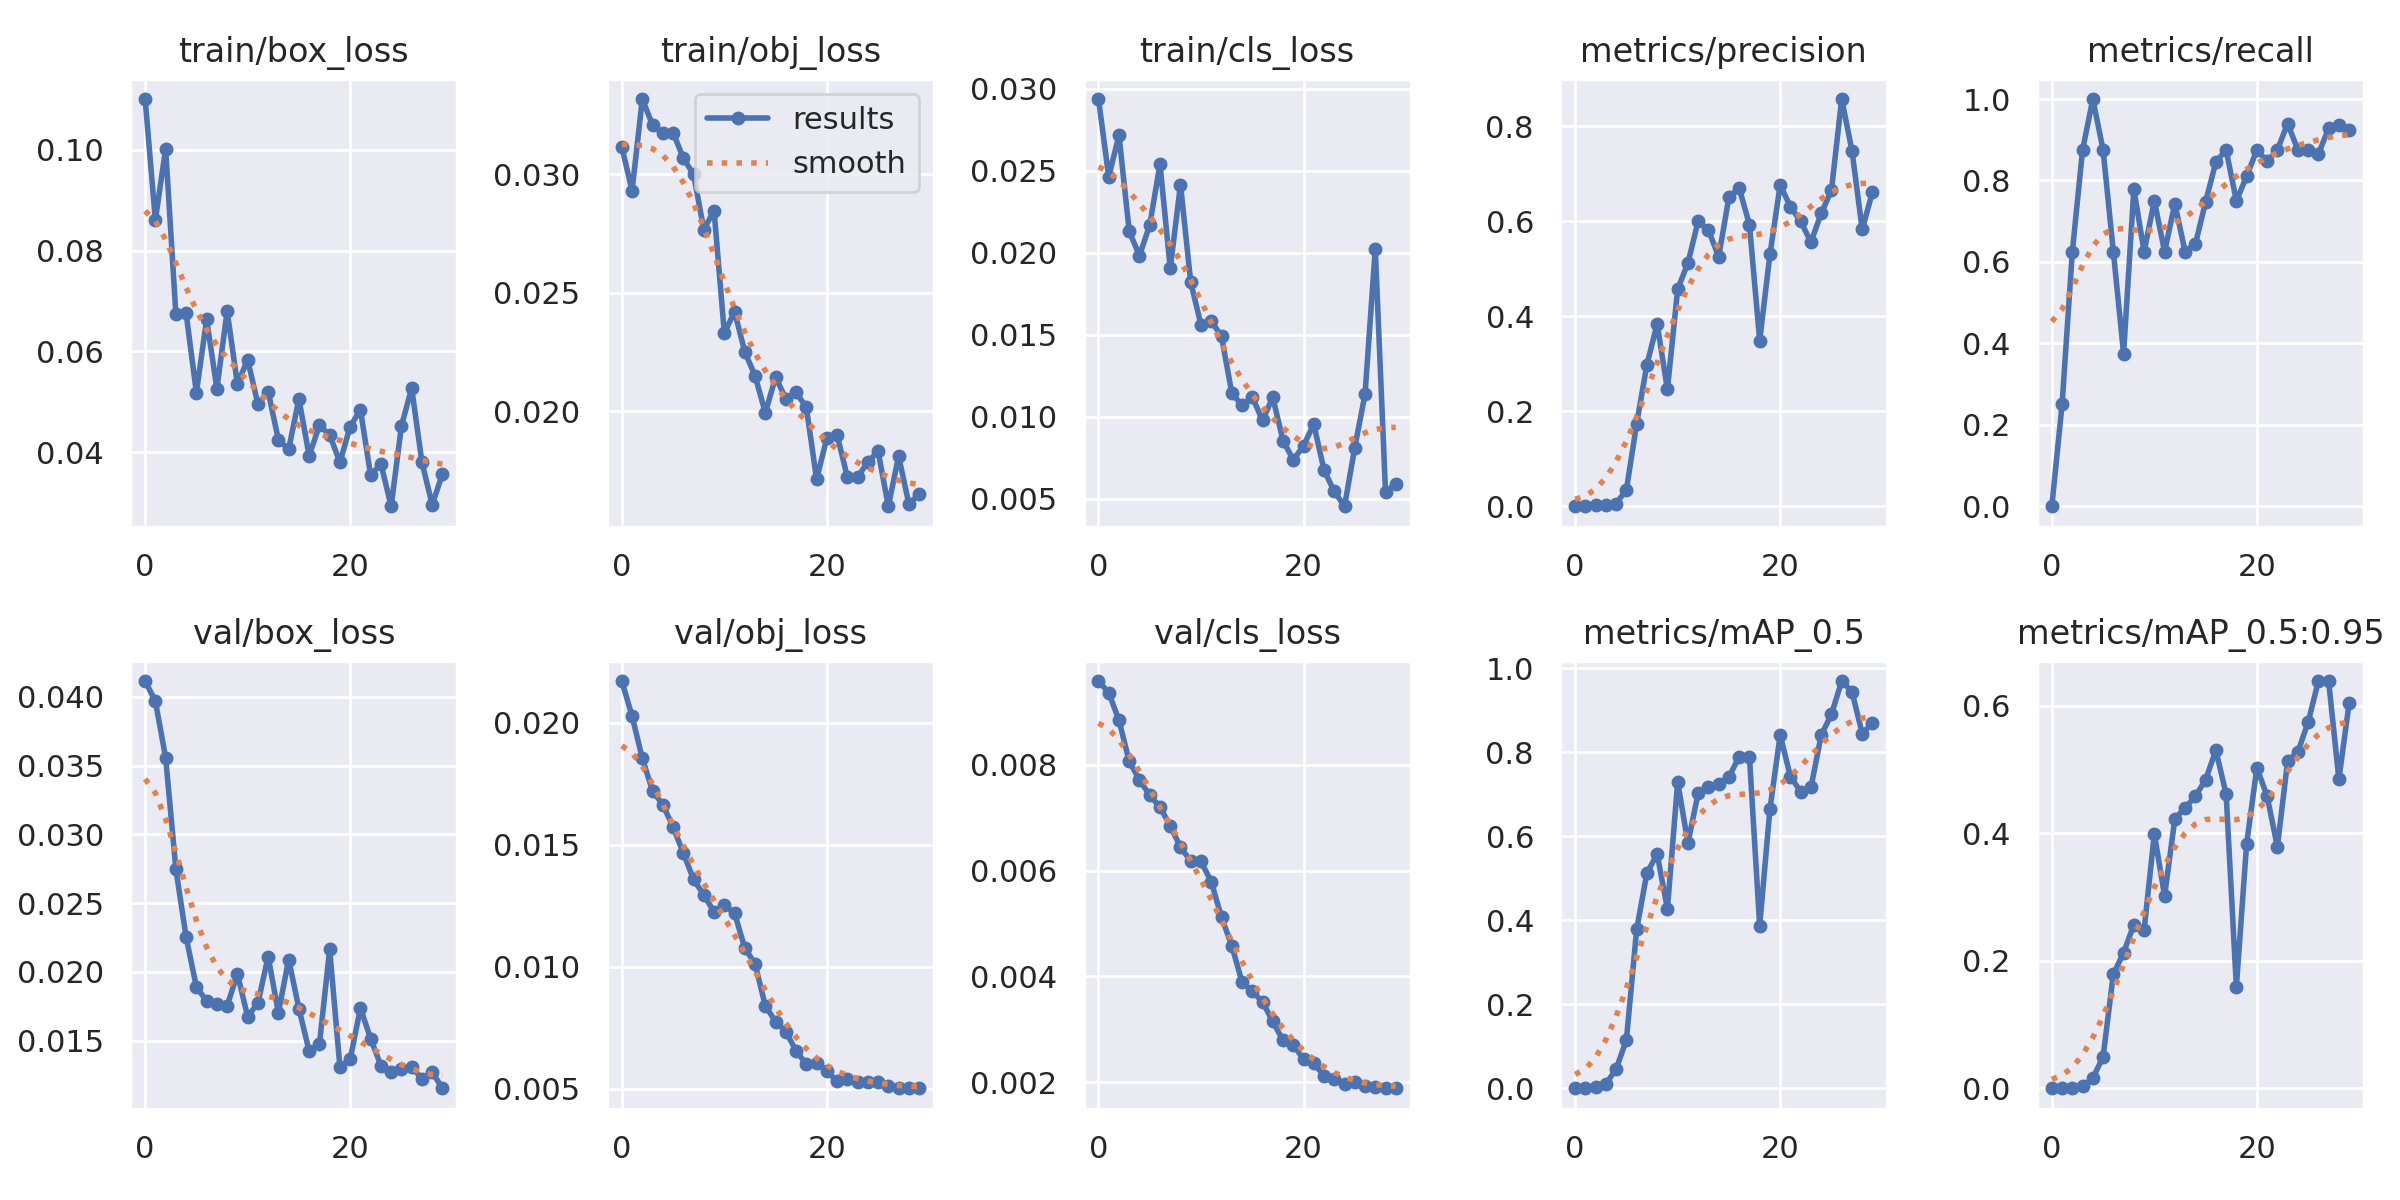

In [18]:
from IPython.display import Image, display

# Exibe o gráfico de métricas do treinamento
display(Image(filename='runs/train/veiculos_yolo_30ep2/results.png', width=1200))


## Inferência no conjunto de teste (modelo com 30 épocas)

Nesta etapa, utilizamos o modelo YOLOv5 treinado com 30 épocas para realizar inferência nas imagens do conjunto de teste. O objetivo é observar o desempenho do modelo em imagens não vistas anteriormente.

O tempo total de execução será registrado para fins comparativos com outras versões e abordagens, conforme exigido na Entrega 2.


In [19]:
import time

# Parâmetros utilizados:
# --weights: caminho para o modelo treinado (melhor versão salva durante o treino de 30 épocas)
# --img: tamanho das imagens usadas na inferência (em pixels)
# --conf: nível mínimo de confiança para exibir uma detecção
# --source: diretório com as imagens de teste
# --name: nome da pasta de saída (dentro de runs/detect)

# Marca o início da inferência
inicio = time.time()

# Executa a inferência com o modelo treinado
!python detect.py \
  --weights runs/train/veiculos_yolo_30ep/weights/best.pt \
  --img 640 \
  --conf 0.25 \
  --source /content/drive/MyDrive/1TIAOR20242_FASE6_CAP1/dataset_images/images/test \
  --name veiculos_yolo_30ep_test

# Marca o fim e calcula a duração
fim = time.time()
duracao = fim - inicio

# Exibe o tempo total de inferência
print(f"Tempo de inferência no conjunto de teste: {duracao:.2f} segundos")


detect: weights=['runs/train/veiculos_yolo_30ep/weights/best.pt'], source=/content/drive/MyDrive/1TIAOR20242_FASE6_CAP1/dataset_images/images/test, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=veiculos_yolo_30ep_test, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-411-gf4d8a84c Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Traceback (most recent call last):
  File "/content/yolov5/detect.py", line 438, in <module>
    main(opt)
  File "/content/yolov5/detect.py", line 433, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/_contextlib.py", line 116, in decorate_context
    return func(*args, **kw

### Conclusão

O desempenho la la la la

# ENTREGA 2

### RESULTADOS YOLO ADAPTAVEL

### YOLO PADRÃO

### CNN

### COMPARATIVO DOS MODELOS